# Machine Learning Project

### Import Liabraries

In [1]:
import numpy as np
import pandas as pd

#visualization tool
import matplotlib.pyplot as plt
import seaborn as sns

#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, kstest, normaltest #hypothesis testing

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#linear regression
from sklearn.linear_model import LinearRegression, Ridge


#evaluation metrics for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Decision Tree
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.pipeline import make_pipeline

# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Problem Statement

In [2]:
df= pd.read_csv(r"E:\ml\adm_data.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.shape

(400, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.drop("Serial No.",axis=1,inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


<Axes: ylabel='GRE Score'>

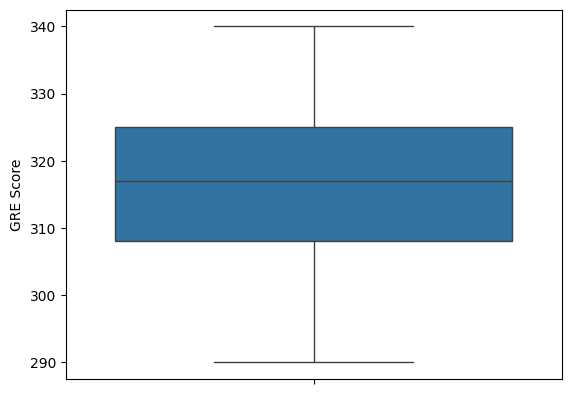

In [8]:
# check outliers
sns.boxplot(df["GRE Score"])

<Axes: ylabel='TOEFL Score'>

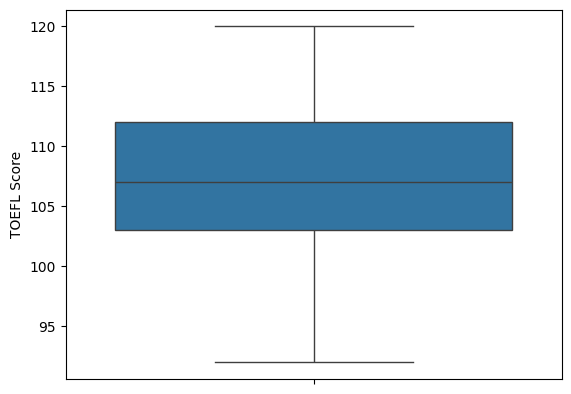

In [9]:
# check outliers
sns.boxplot(df["TOEFL Score"])

<Axes: ylabel='University Rating'>

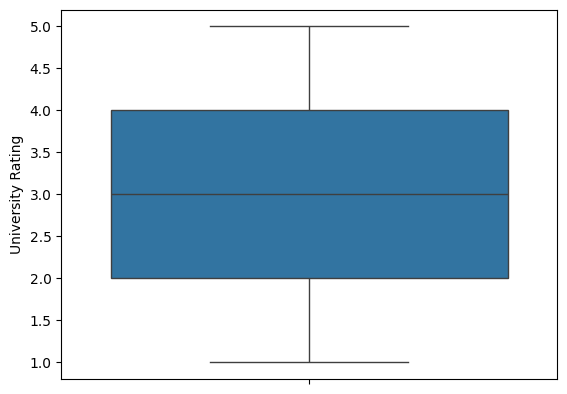

In [10]:
# check outliers
sns.boxplot(df["University Rating"])

<Axes: ylabel='SOP'>

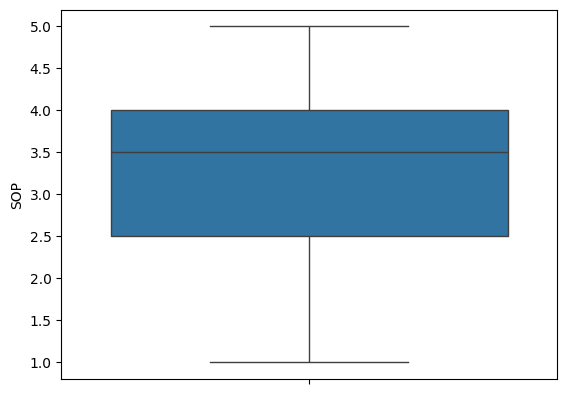

In [11]:
# check outliers
sns.boxplot(df["SOP"])

<Axes: ylabel='LOR '>

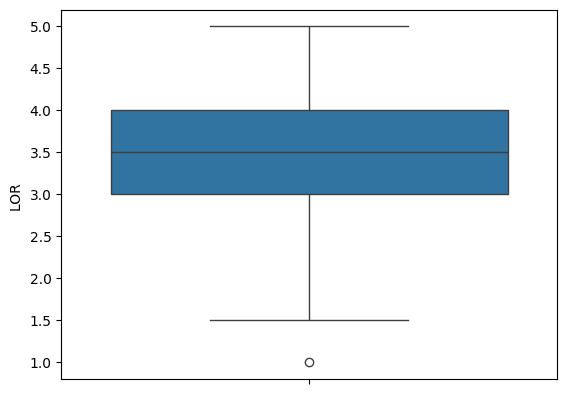

In [12]:
# check outliers
sns.boxplot(df["LOR "])

In [13]:
q1=df["LOR "].quantile(0.25)
q2=df["LOR "].quantile(0.50)
q3=df["LOR "].quantile(0.75)

iqr=q3-q1
lower_tail=q1-1.5*iqr
upper_tail=q3+1.5-iqr

In [14]:
lower_tail

1.5

In [15]:
upper_tail

4.5

In [16]:
df[(df["LOR "] < lower_tail)| (df["LOR "] > upper_tail )]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
22,328,116,5,5.0,5.0,9.50,1,0.94
34,331,112,5,4.0,5.0,9.80,1,0.94
35,320,110,5,5.0,5.0,9.20,1,0.88
46,329,114,5,4.0,5.0,9.30,1,0.86
48,321,110,3,3.5,5.0,8.85,1,0.82
70,332,118,5,5.0,5.0,9.64,1,0.94
71,336,112,5,5.0,5.0,9.76,1,0.96
72,321,111,5,5.0,5.0,9.45,1,0.93
74,314,106,3,3.0,5.0,8.90,0,0.74
81,340,120,4,5.0,5.0,9.50,1,0.96


<Axes: ylabel='CGPA'>

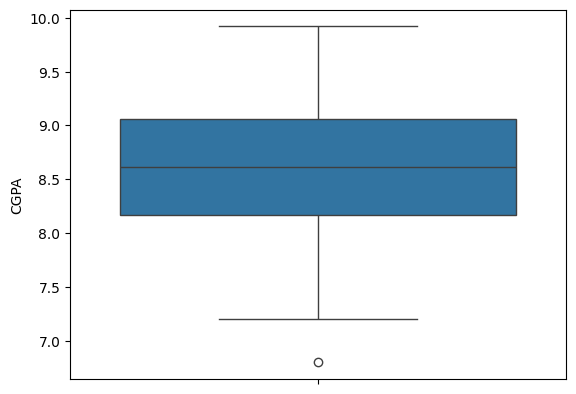

In [17]:
# check outliers
sns.boxplot(df["CGPA"])

In [18]:
q1=df["CGPA"].quantile(0.25)
q2=df["CGPA"].quantile(0.50)
q3=df["CGPA"].quantile(0.75)

iqr=q3-q1
lower_tail=q1-1.5*iqr
upper_tail=q3+1.5-iqr

In [19]:
lower_tail

6.83125

In [20]:
upper_tail

9.67

In [21]:
df[(df["CGPA"] < lower_tail)| (df["CGPA"] > upper_tail )]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
23,334,119,5,5.0,4.5,9.70,1,0.95
24,336,119,5,4.0,3.5,9.80,1,0.97
34,331,112,5,4.0,5.0,9.80,1,0.94
47,339,119,5,4.5,4.0,9.70,0,0.89
58,300,99,1,3.0,2.0,6.80,1,0.36
71,336,112,5,5.0,5.0,9.76,1,0.96
130,339,114,5,4.0,4.5,9.76,1,0.96
143,340,120,4,4.5,4.0,9.92,1,0.97
148,339,116,4,4.0,3.5,9.80,1,0.96
202,340,120,5,4.5,4.5,9.91,1,0.97


<Axes: ylabel='Research'>

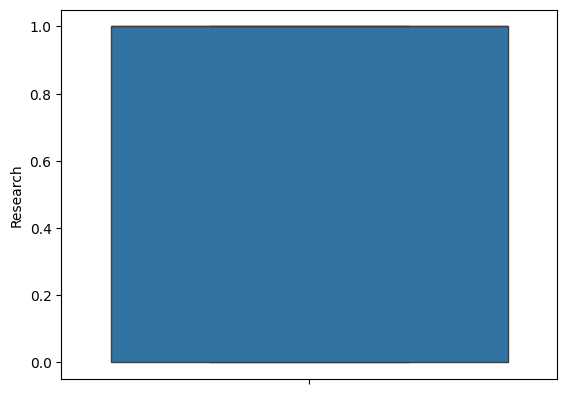

In [22]:
# check outliers
sns.boxplot(df["Research"])

<Axes: ylabel='Chance of Admit '>

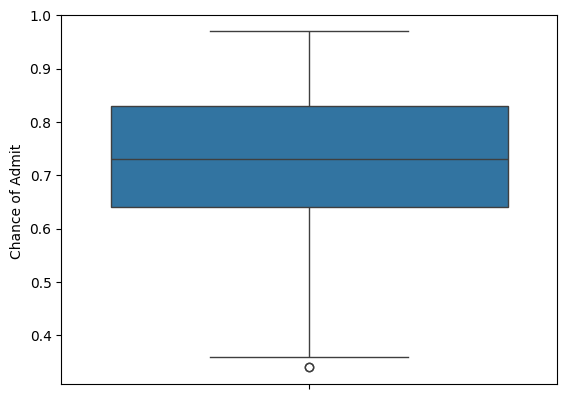

In [23]:
# check outliers
sns.boxplot(df["Chance of Admit "])

In [24]:
q1=df["Chance of Admit "].quantile(0.25)
q2=df["Chance of Admit "].quantile(0.50)
q3=df["Chance of Admit "].quantile(0.75)

iqr=q3-q1
lower_tail=q1-1.5*iqr
upper_tail=q3+1.5-iqr

In [25]:
lower_tail

0.3550000000000001

In [26]:
upper_tail

2.14

In [27]:
df[(df["Chance of Admit "] < lower_tail)| (df["Chance of Admit "]> upper_tail)]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


In [28]:
print(df.columns)


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


# Feature Engineering

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


# Feature Selection

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


## Assumption 1. Linearity

In [31]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<Axes: >

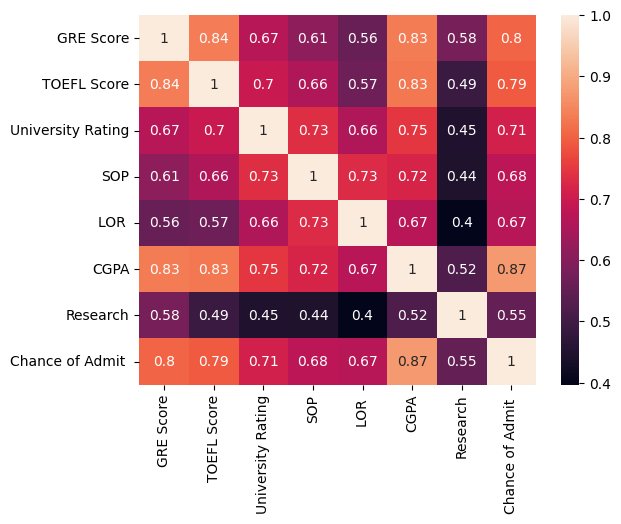

In [32]:
sns.heatmap(df.corr(),annot=True)

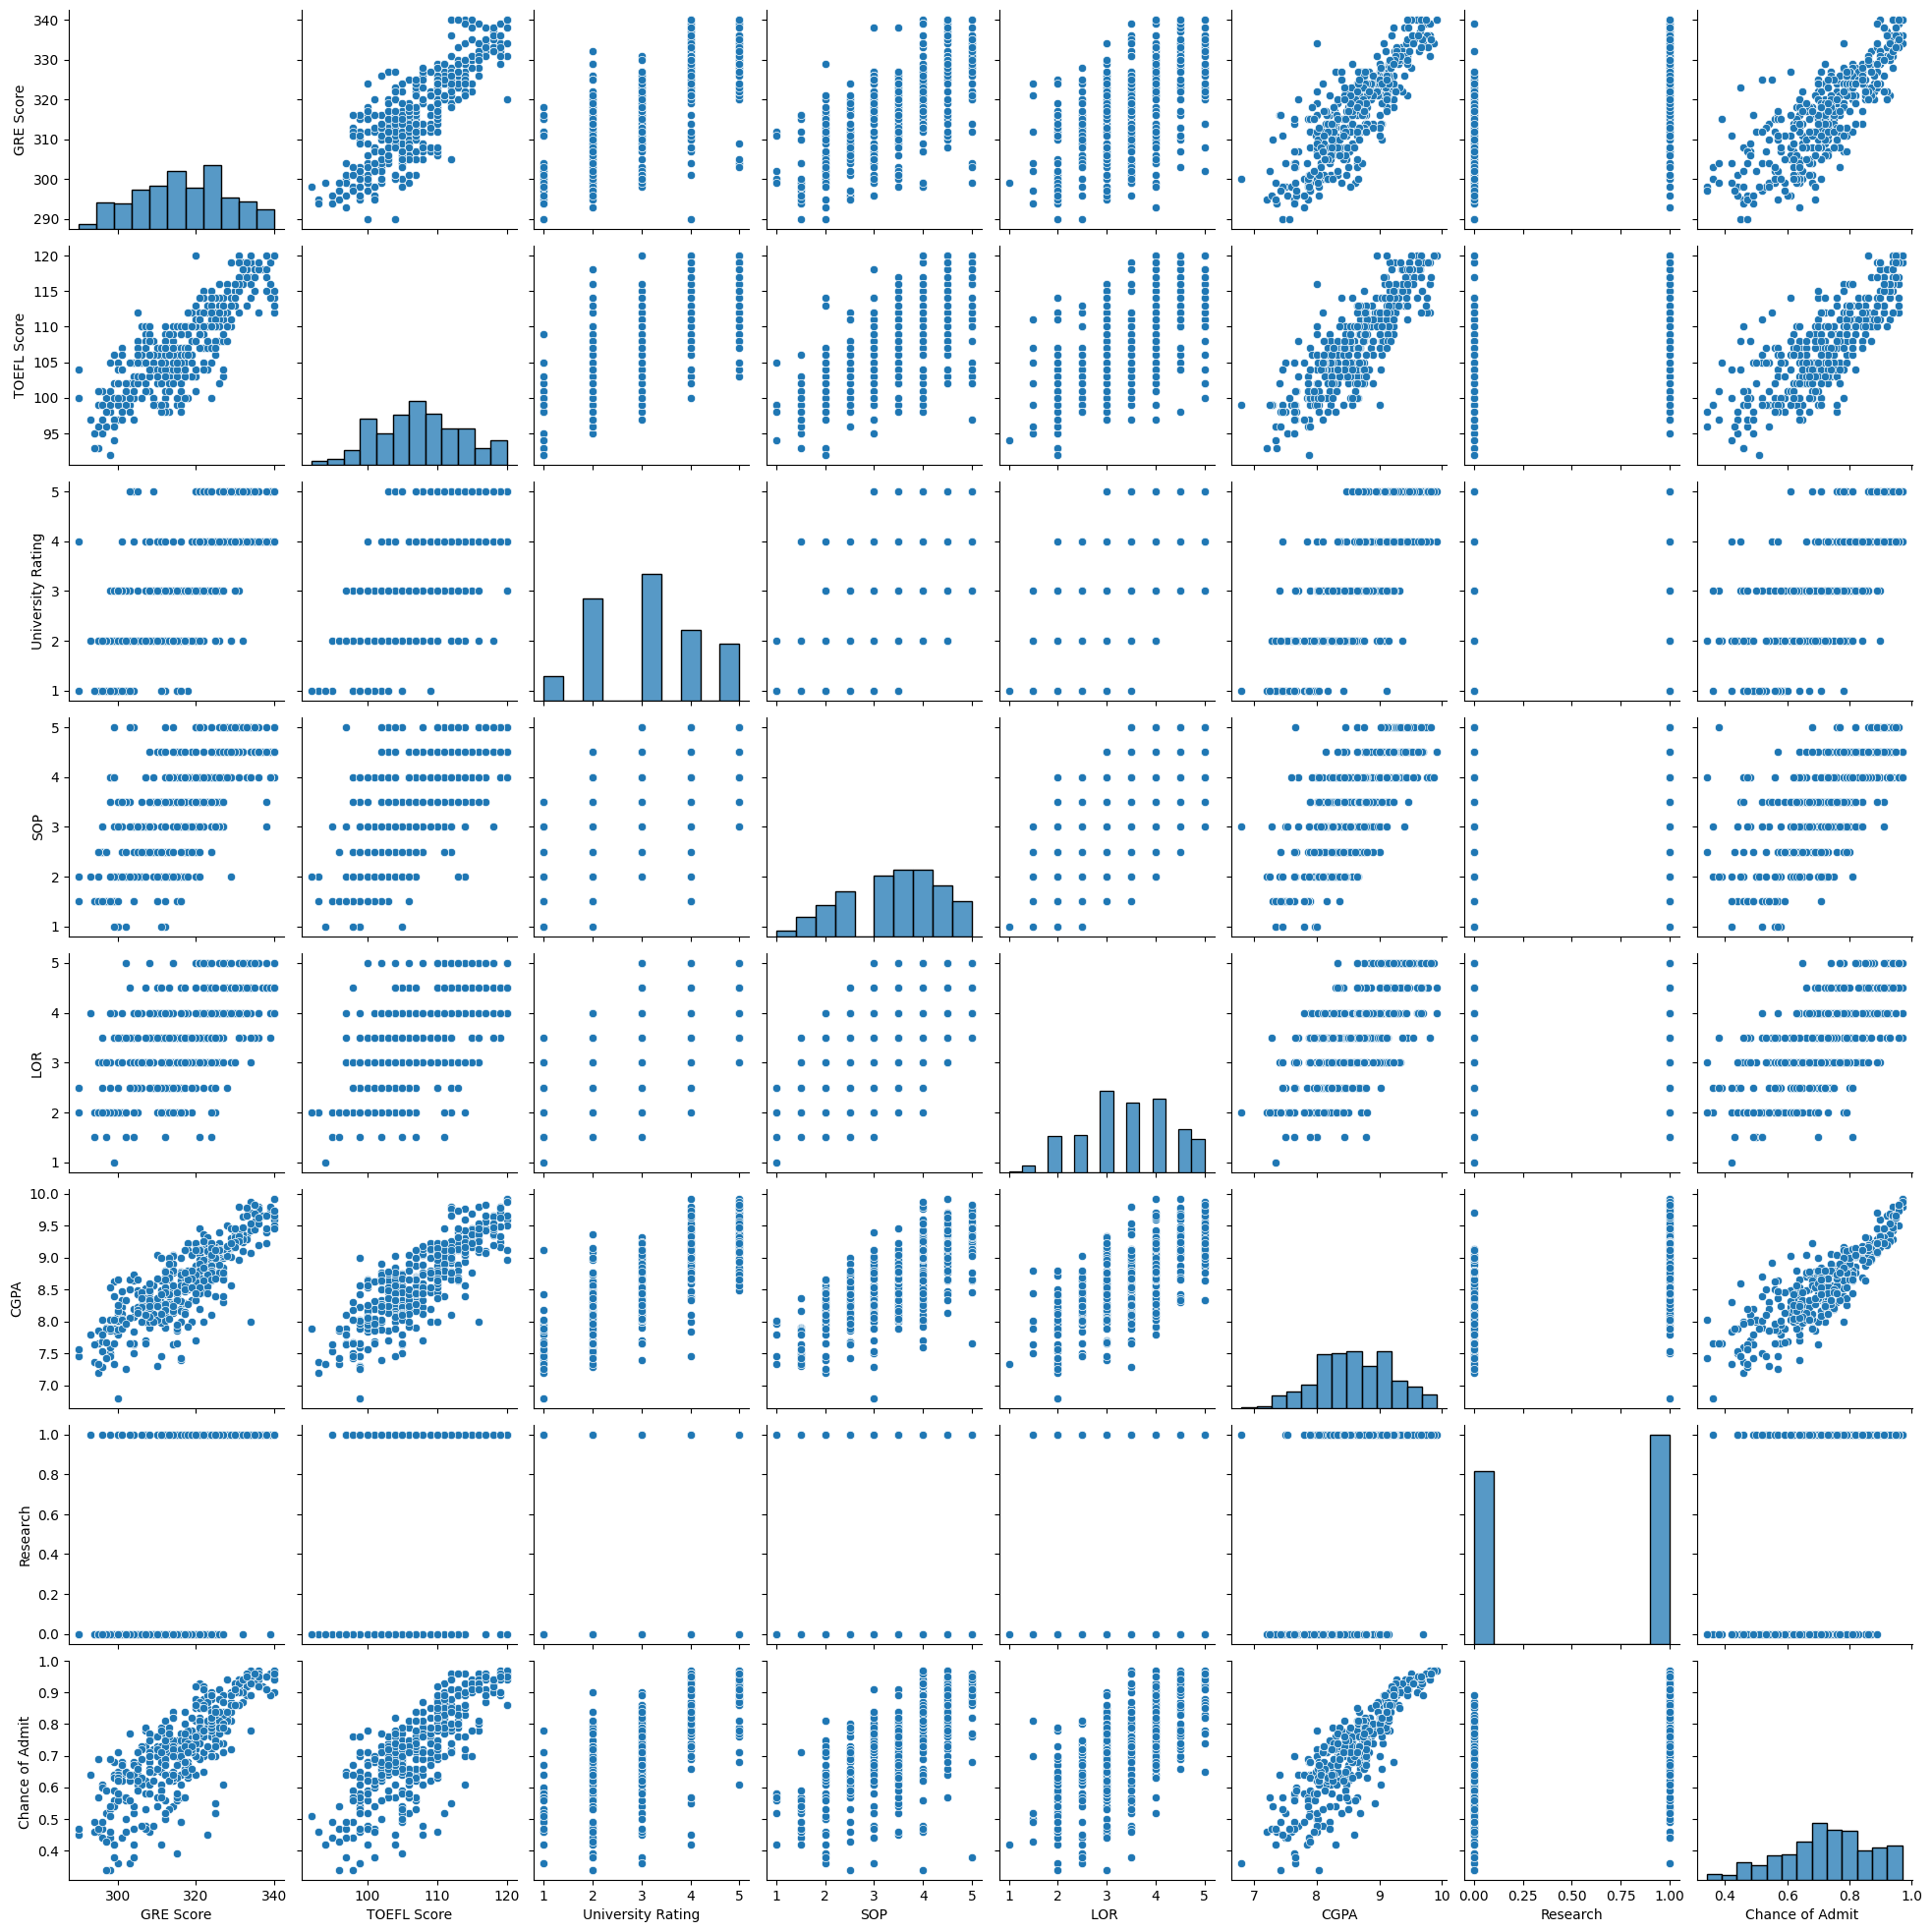

In [33]:
sns.pairplot(df)

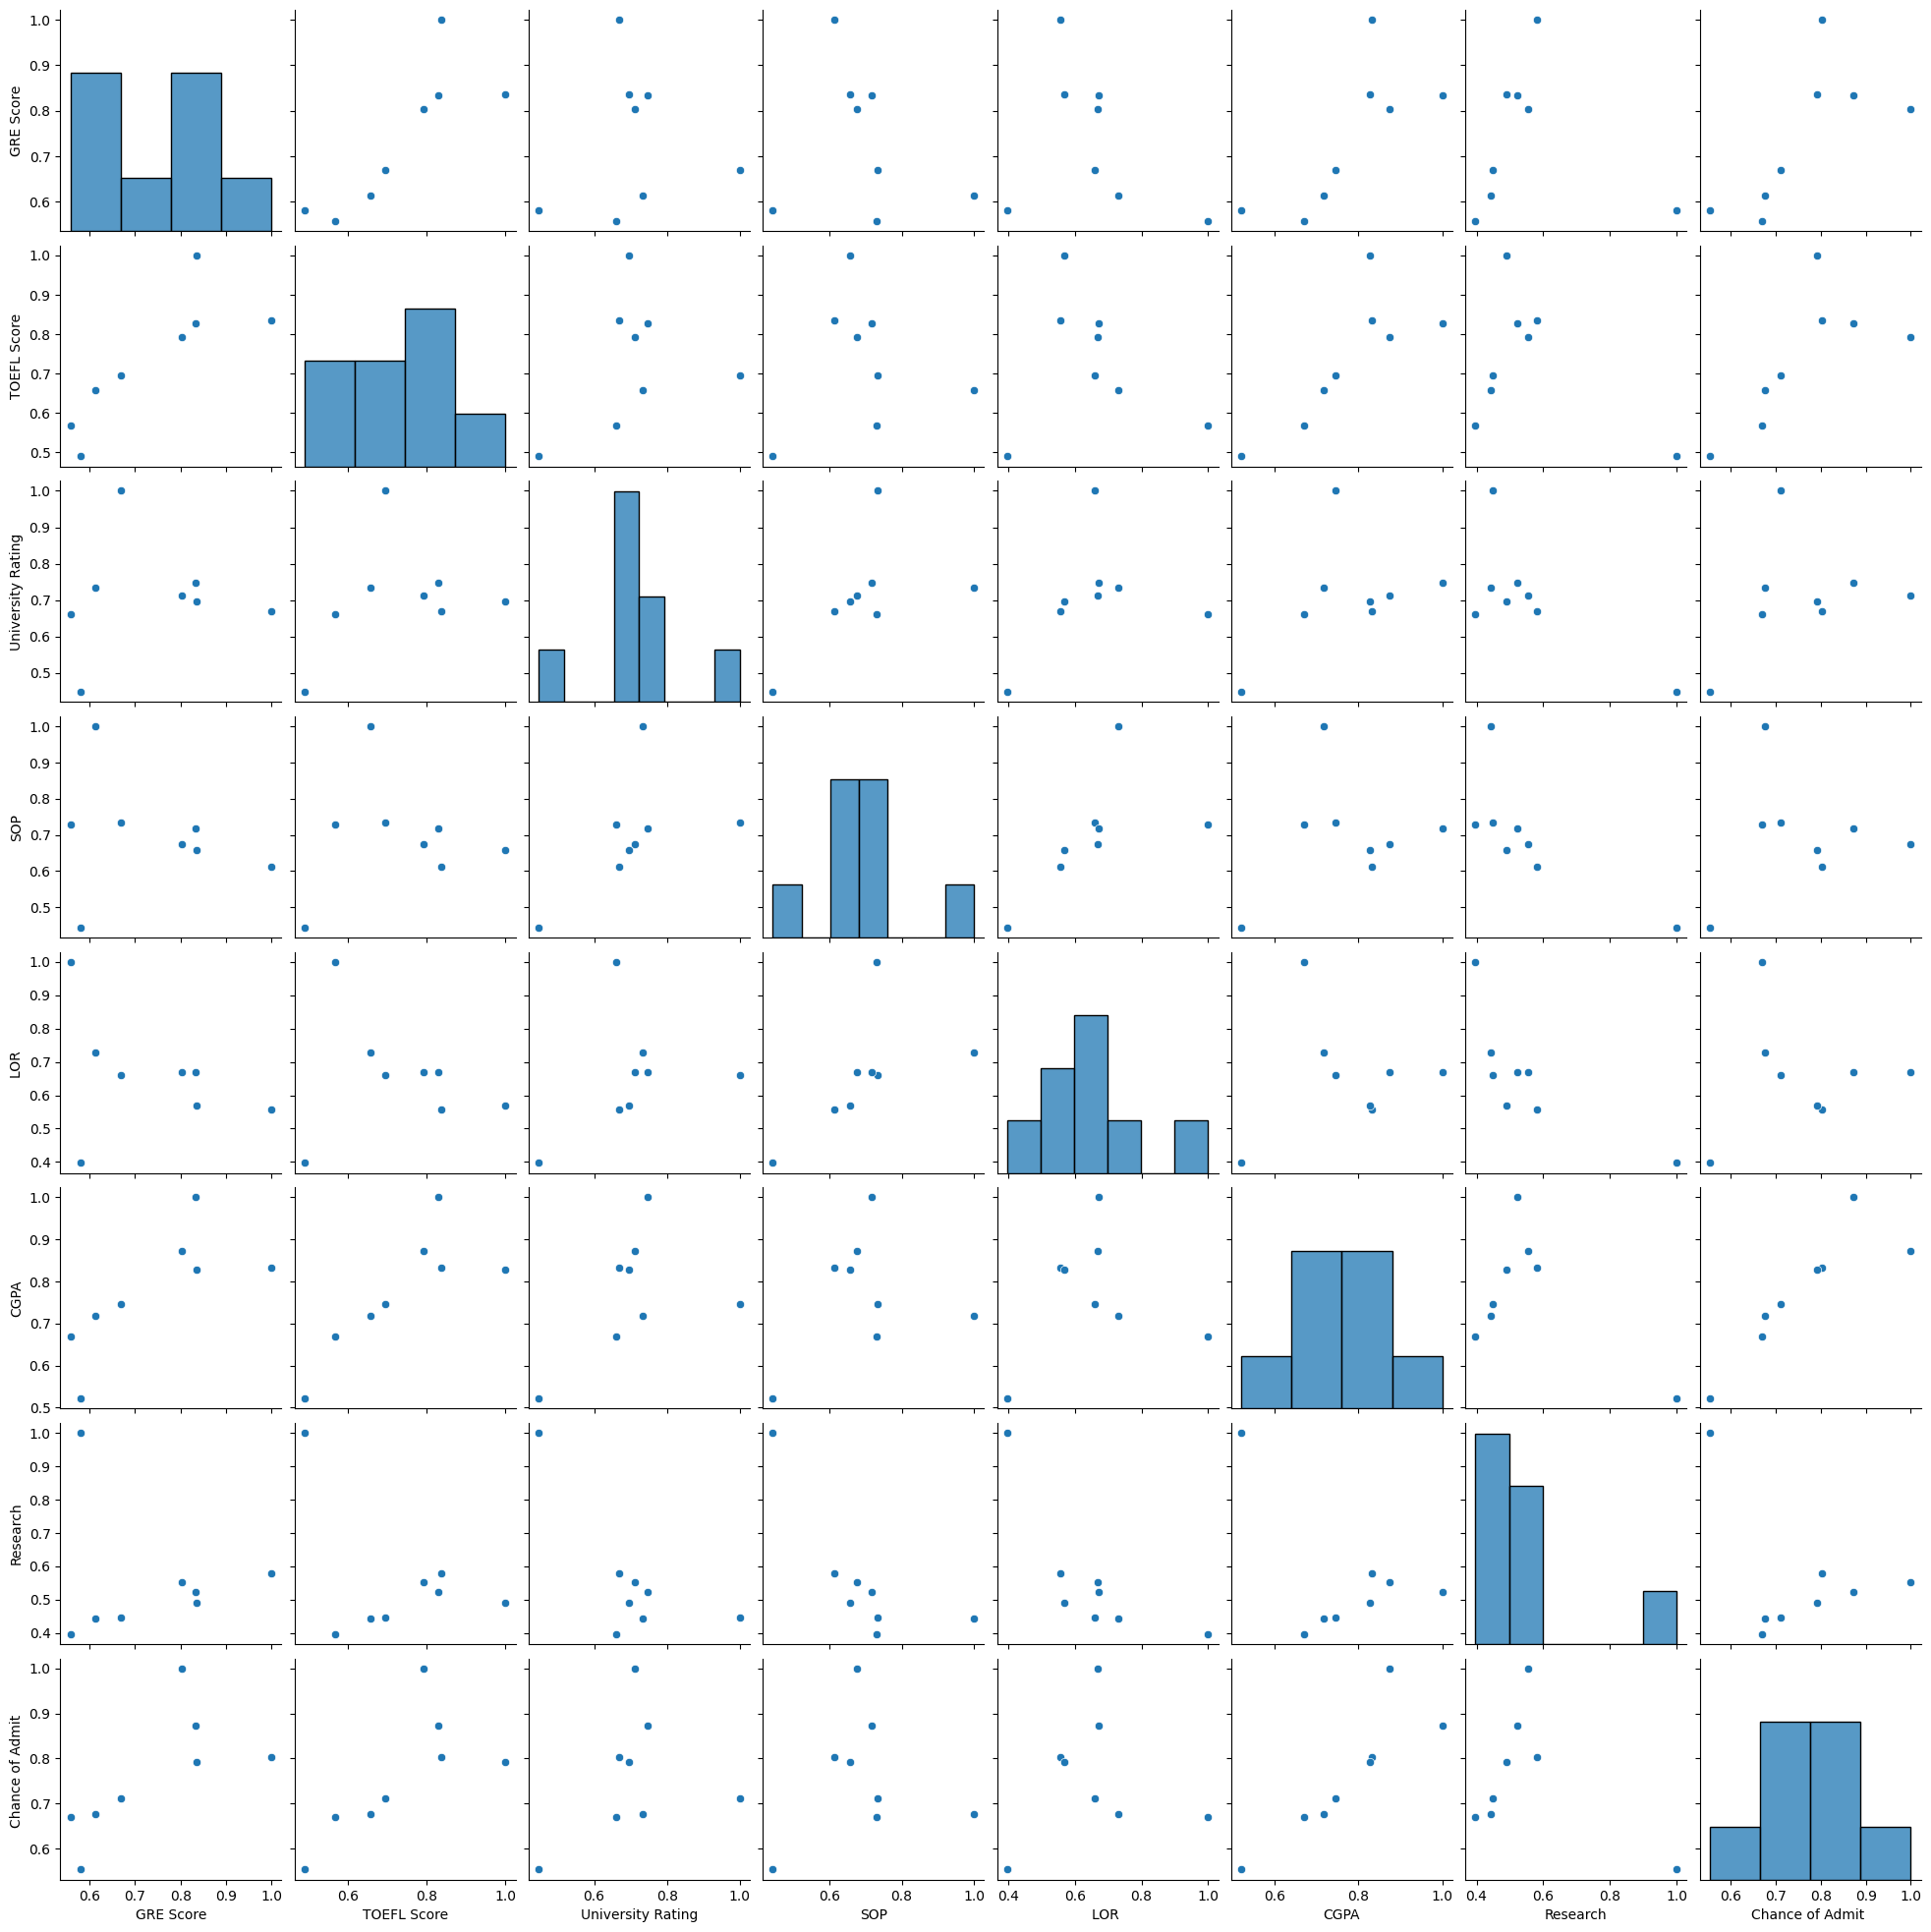

In [34]:
sns.pairplot(df.corr())

## Assumption 2. No Multicolinearity

In [35]:
df1=df.iloc[:,:7]
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [36]:
vif_df=pd.DataFrame()
vif_df["Features"]=df1.columns
vif_df

,Features
0,GRE Score
1,TOEFL Score
2,University Rating
3,SOP
4,LOR
5,CGPA
6,Research


In [37]:
vif_list=[]
for i in range(df1.shape[1]):
    vif= variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)

In [38]:
vif_list

[1438.4517892185577,
 1349.7469482740144,
 22.14370533096426,
 38.05017677579483,
 38.411722253881706,
 1080.4911794302955,
 2.8599378196407557]

In [39]:
vif_df["VIF"]=vif_list
vif_df

,Features,VIF
0,GRE Score,1438.451789
1,TOEFL Score,1349.746948
2,University Rating,22.143705
3,SOP,38.050177
4,LOR,38.411722
5,CGPA,1080.491179
6,Research,2.859938


In [40]:
# split data

In [41]:
x=df.iloc[:,:7]
y=df["Chance of Admit "]

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [43]:
xtrain.shape

(320, 7)

In [44]:
xtest.shape

(80, 7)

In [45]:
ytrain.shape

(320,)

In [46]:
ytest.shape

(80,)

## Model Training

In [47]:
model=LinearRegression()
model

LinearRegression()

In [48]:
lin_reg_model=model.fit(xtrain,ytrain)
lin_reg_model

LinearRegression()

## Assumption 3: Normality of residual

In [49]:
ytrain

163    0.68
195    0.78
129    0.92
105    0.69
16     0.66
       ... 
267    0.73
294    0.61
292    0.56
348    0.57
85     0.76
Name: Chance of Admit , Length: 320, dtype: float64

In [50]:
ytrain_predict=lin_reg_model.predict(xtrain)

In [51]:
ytrain_predict

array([0.6920713 , 0.70767935, 0.9238477 , 0.78830774, 0.7162648 ,
       0.6050673 , 0.62866509, 0.78025783, 0.7633931 , 0.85192573,
       0.65043706, 0.77566587, 0.63832633, 0.73250148, 0.72587838,
       0.91102039, 0.84230817, 0.91316518, 0.81560704, 0.52711968,
       0.69905448, 0.62209126, 0.56102955, 0.50763771, 0.54343637,
       0.79328692, 0.67097108, 0.53380393, 0.79042767, 0.67246027,
       0.51353633, 0.4829225 , 0.67995141, 0.6838207 , 0.59165952,
       0.90065319, 0.63545355, 0.89756823, 0.63643692, 0.79608011,
       0.74633539, 0.60236181, 0.67911514, 0.68468119, 0.64800748,
       0.94524791, 0.72703238, 0.54430325, 0.51576629, 0.64722292,
       0.72229243, 0.84106591, 0.72892629, 0.88497975, 0.87702387,
       0.70168462, 0.68093484, 0.49723932, 0.8275816 , 0.63791165,
       0.665842  , 0.61148278, 0.95404953, 0.75050095, 0.47324331,
       0.80855994, 0.74827586, 0.57568815, 0.56200355, 0.67689163,
       0.7692795 , 0.55254118, 0.79953074, 0.60817991, 0.65905

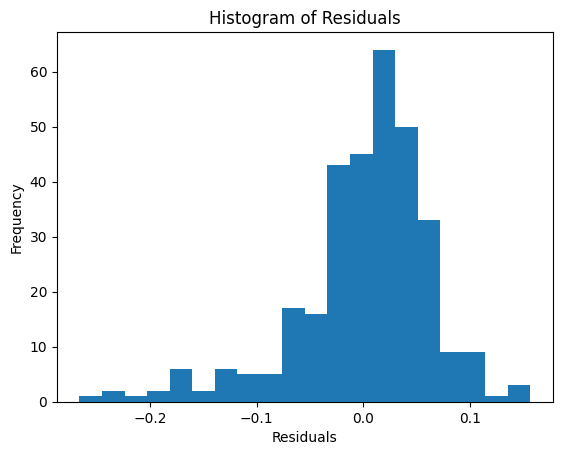

In [52]:
residual=ytrain-ytrain_predict
plt.hist(residual,bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

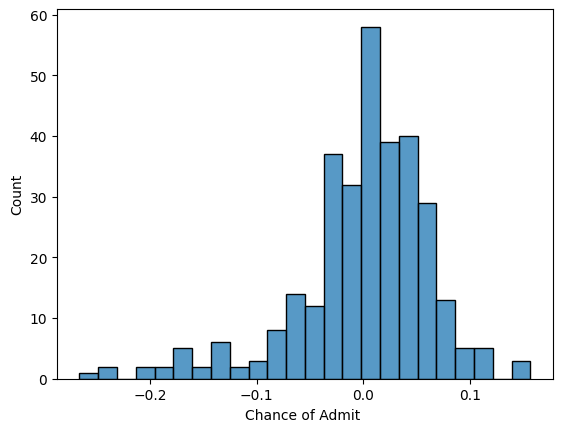

In [53]:
sns.histplot(residual)

<Axes: xlabel='Chance of Admit ', ylabel='Density'>

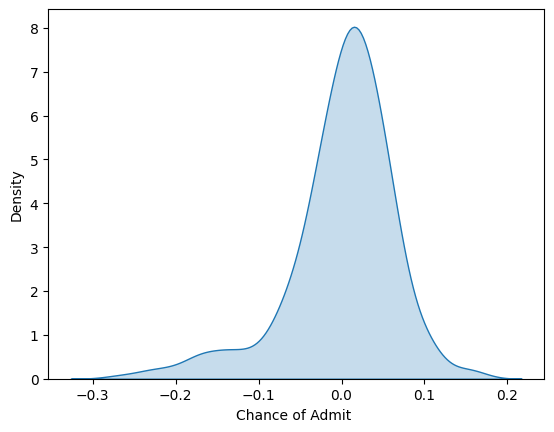

In [54]:
sns.kdeplot(residual, fill=True)

### hypothesis tesing 

In [55]:
stats, p_val = shapiro(residual)
print(stats,p_val)

if p_val>=0.05:
    print("DATA is normally distributed")
    print("Null hypothesis H0 is true")
    
    
else:
    print("Data is not normally distributed")
    print("alternative hypothesis H1 is true")

0.9207532881143168 5.615370665754713e-12
Data is not normally distributed
alternative hypothesis H1 is true


In [56]:
# data is not normally distributed

In [57]:
transformed_data = np.log(df)

print("Original data:", df)
print("Transformed data (log transformed):", transformed_data)

Original data:      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Chance of Admit   
0                0.92  
1           

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [58]:
residuals = np.random.normal(loc=0, scale=1, size=100)  # residuals, replace with your actual residuals

# Shapiro-Wilk test for normality
statistic, p_value = shapiro(residuals)

print("Shapiro-Wilk test statistic:", statistic)
print("p-value:", p_value)

# Check if the residuals are normally distributed or not
if p_value >= 0.05:
    print("Residuals are normally distributed ")
else:
    print("Residuals are not normally distributed ")

Shapiro-Wilk test statistic: 0.9842191605008825
p-value: 0.2785964760884738
Residuals are normally distributed 


## Assumption 4: Homoscadasticity

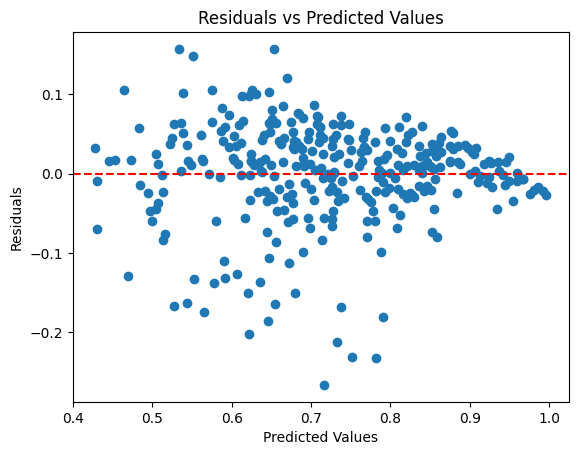

In [59]:
import matplotlib.pyplot as plt

# Assuming 'ytrain' is the array of actual target values and 'residual' is the array of residuals
# Assuming 'ytrain_predict' is the array of predicted target values

plt.scatter(ytrain_predict, residual)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0
plt.show()


## 6. Model Evaluation

In [60]:
mse= mean_squared_error(ytrain,ytrain_predict)           # lower MSE indicates better model performance.
print(f"Mean Squared error:{mse}")

rmse=np.sqrt(mse)
print(f"Root Mean Squared error: {rmse}")                
                                                      
mae = mean_absolute_error(ytrain,ytrain_predict)          #the average absolute differences between the predicted and actual values.
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,ytrain_predict)
print(f"R2 score : {r2score}")                          #Higher values of R2 indicate better model fit to the data.

Mean Squared error:0.004025845521737764
Root Mean Squared error: 0.06344955099713287
Mean Absolute error : 0.04546981212255725
R2 score : 0.8027778951029252


In [61]:
ytest

103    0.57
286    0.92
2      0.72
250    0.74
77     0.64
       ... 
186    0.84
25     0.94
209    0.68
34     0.94
35     0.88
Name: Chance of Admit , Length: 80, dtype: float64

In [62]:
ytest_predict = lin_reg_model.predict(xtest)
ytest_predict

array([0.70301254, 0.88570546, 0.6506957 , 0.70308307, 0.58184931,
       0.88050931, 0.72210568, 0.85686189, 0.66439225, 0.75554371,
       0.73896089, 0.74263213, 0.69800954, 0.69968914, 0.68958899,
       0.64441819, 0.9405201 , 0.90212362, 0.60724482, 0.60687782,
       0.77862241, 0.78814717, 0.82892945, 0.79968743, 0.53501953,
       0.83040235, 0.959288  , 0.93180908, 0.77675512, 0.57582734,
       0.72091868, 0.74632047, 0.53660494, 0.64448514, 0.71717054,
       0.78722255, 0.55551619, 0.70929408, 0.95706631, 0.88381924,
       0.69769532, 0.70448061, 0.72628642, 0.73937683, 0.78496583,
       0.90271009, 0.70647176, 0.67991388, 0.66463551, 0.82420032,
       0.92801683, 0.94940379, 0.59389702, 0.51097149, 0.55288376,
       0.64547226, 0.64071545, 0.85009751, 0.66418133, 0.52259044,
       0.77960806, 0.79816773, 0.62829133, 0.61287041, 0.63315405,
       0.77751623, 0.68786005, 0.77415755, 0.7554368 , 0.95700343,
       0.89648349, 0.64270897, 0.7909583 , 0.82013315, 0.50533

In [63]:
mse = mean_squared_error(ytest,ytest_predict)
print(f"Mean Squared error : {mse}")                 # 

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")        # 
mae = mean_absolute_error(ytest,ytest_predict)   # 
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,ytest_predict)
print(f"R2 score : {r2score}")                       # 

Mean Squared error : 0.003951946000620488
Root Mean Squared error : 0.0628645050932598
Mean Absolute error : 0.04437831927393535
R2 score : 0.7985698621267563


### Ridge Regressor(L2)

In [64]:
# Initialize the Ridge Regression model
ridge_reg = Ridge(alpha=1.0) # Alpha is the regularization strength
ridge_reg

Ridge()

In [65]:
# Train the Ridge Regression model
ridge_reg.fit(xtrain, ytrain)


Ridge()

In [66]:
# Make predictions on the traing set
y_pred_train = ridge_reg.predict(xtrain)
y_pred_train

array([0.69200755, 0.70630334, 0.92481135, 0.78802014, 0.71597048,
       0.6047881 , 0.62951483, 0.78168349, 0.76156248, 0.85133608,
       0.65188311, 0.77404248, 0.63889963, 0.73421689, 0.72465136,
       0.91147444, 0.84212411, 0.91256517, 0.81419116, 0.52851596,
       0.69895258, 0.62172371, 0.55968597, 0.51019978, 0.54567077,
       0.79307062, 0.67088267, 0.53333229, 0.79087147, 0.67011287,
       0.51252872, 0.48619284, 0.67870025, 0.68259201, 0.59184908,
       0.9017168 , 0.63559403, 0.89667973, 0.63585571, 0.79513835,
       0.74519702, 0.6014172 , 0.67996353, 0.68427552, 0.64672452,
       0.94316498, 0.72638271, 0.54403123, 0.51645891, 0.64765424,
       0.71836519, 0.8409    , 0.72968617, 0.88591311, 0.87670764,
       0.70075007, 0.6792034 , 0.499239  , 0.82729281, 0.63785127,
       0.66361056, 0.61218246, 0.95325108, 0.75321828, 0.47208493,
       0.80649555, 0.74807498, 0.57482615, 0.56022252, 0.67484523,
       0.76990833, 0.55340243, 0.79879537, 0.60935237, 0.66292

In [67]:
# Make predictions on the training set
mse= mean_squared_error(ytrain, y_pred_train)
print(f"Mean Squared error:{mse}")

rmse=np.sqrt(mse)
print(f"Root Mean Squared error: {rmse}")

mae = mean_absolute_error(ytrain, y_pred_train)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain, y_pred_train)
print(f"R2 score : {r2score}")

Mean Squared error:0.004027646561680416
Root Mean Squared error: 0.0634637421027189
Mean Absolute error : 0.04538541315660282
R2 score : 0.8026896639756811


In [68]:
# Make predictions on the testing set
y_pred = ridge_reg.predict(xtest)
y_pred

array([0.70362288, 0.88731142, 0.65284282, 0.70252427, 0.58016167,
       0.88015202, 0.72345908, 0.85625537, 0.66488871, 0.75509314,
       0.73970268, 0.74236906, 0.69867075, 0.70033172, 0.68953276,
       0.64520044, 0.93975924, 0.90136116, 0.60944746, 0.60835996,
       0.77902655, 0.78683569, 0.82616976, 0.79802842, 0.53644683,
       0.83090041, 0.95772698, 0.93201246, 0.77549444, 0.57533274,
       0.72134471, 0.74627319, 0.53525771, 0.64447898, 0.71686825,
       0.78731925, 0.55466952, 0.70916029, 0.95646646, 0.88260019,
       0.69745989, 0.70357542, 0.72559352, 0.73908221, 0.782182  ,
       0.90281639, 0.70665952, 0.68092494, 0.66590115, 0.82276371,
       0.92725896, 0.94957664, 0.59747785, 0.51300273, 0.5519072 ,
       0.64587045, 0.64121301, 0.84912825, 0.66742458, 0.52147259,
       0.78031741, 0.79595294, 0.62863159, 0.61340985, 0.63441495,
       0.77846057, 0.68679662, 0.77307852, 0.75646572, 0.95547173,
       0.89632358, 0.64242229, 0.79168971, 0.81863481, 0.50812

In [69]:
# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")        

mae = mean_absolute_error(ytest, y_pred)   
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest, y_pred)
print(f"R2 score : {r2score}") 

Mean Squared Error: 0.003951875114658485
Root Mean Squared error : 0.06286394129116059
Mean Absolute error : 0.04446465577834917
R2 score : 0.7985734751743783


# Decision Tree

In [70]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


## Model Training

In [71]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg

DecisionTreeRegressor(random_state=42)

In [72]:
dt_reg_model=dt_reg.fit(xtrain, ytrain)
dt_reg_model

DecisionTreeRegressor(random_state=42)

## Model Evaluation

In [73]:
ytrain_pred = dt_reg_model.predict(xtrain)

In [74]:
ytrain_pred

array([0.68, 0.78, 0.92, 0.69, 0.66, 0.64, 0.64, 0.72, 0.79, 0.88, 0.73,
       0.74, 0.68, 0.52, 0.76, 0.9 , 0.82, 0.91, 0.79, 0.36, 0.63, 0.72,
       0.61, 0.52, 0.38, 0.77, 0.61, 0.69, 0.78, 0.56, 0.49, 0.54, 0.53,
       0.76, 0.46, 0.9 , 0.65, 0.93, 0.64, 0.82, 0.76, 0.62, 0.72, 0.76,
       0.71, 0.96, 0.77, 0.56, 0.44, 0.75, 0.7 , 0.85, 0.75, 0.9 , 0.93,
       0.73, 0.69, 0.45, 0.88, 0.64, 0.71, 0.65, 0.92, 0.78, 0.49, 0.84,
       0.79, 0.64, 0.58, 0.71, 0.74, 0.42, 0.84, 0.62, 0.7 , 0.94, 0.67,
       0.8 , 0.42, 0.52, 0.78, 0.72, 0.93, 0.7 , 0.65, 0.93, 0.86, 0.73,
       0.78, 0.79, 0.71, 0.71, 0.78, 0.95, 0.72, 0.76, 0.81, 0.87, 0.57,
       0.57, 0.86, 0.97, 0.61, 0.66, 0.81, 0.83, 0.47, 0.62, 0.79, 0.54,
       0.85, 0.87, 0.67, 0.71, 0.66, 0.96, 0.62, 0.7 , 0.8 , 0.39, 0.8 ,
       0.71, 0.86, 0.61, 0.78, 0.86, 0.7 , 0.87, 0.69, 0.78, 0.44, 0.77,
       0.74, 0.61, 0.64, 0.94, 0.82, 0.75, 0.73, 0.82, 0.75, 0.79, 0.83,
       0.65, 0.71, 0.9 , 0.79, 0.8 , 0.8 , 0.64, 0.

In [75]:
# Make predictions on the training set
mse= mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared error:{mse}")

rmse=np.sqrt(mse)
print(f"Root Mean Squared error: {rmse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 score : {r2score}")

Mean Squared error:1.1555579666323415e-34
Root Mean Squared error: 1.0749688212373146e-17
Mean Absolute error : 1.0408340855860842e-18
R2 score : 1.0


In [76]:
# Make predictions on the testing set
y_pred = dt_reg.predict(xtest)
y_pred

array([0.79, 0.9 , 0.5 , 0.73, 0.67, 0.91, 0.73, 0.88, 0.72, 0.79, 0.71,
       0.73, 0.72, 0.79, 0.77, 0.64, 0.92, 0.91, 0.62, 0.66, 0.75, 0.82,
       0.89, 0.78, 0.36, 0.84, 0.96, 0.92, 0.74, 0.61, 0.75, 0.68, 0.58,
       0.79, 0.64, 0.76, 0.56, 0.57, 0.94, 0.93, 0.77, 0.81, 0.77, 0.77,
       0.84, 0.91, 0.73, 0.52, 0.79, 0.84, 0.93, 0.92, 0.59, 0.54, 0.46,
       0.7 , 0.72, 0.88, 0.65, 0.49, 0.75, 0.78, 0.64, 0.71, 0.64, 0.71,
       0.71, 0.77, 0.78, 0.97, 0.93, 0.68, 0.82, 0.86, 0.54, 0.75, 0.92,
       0.73, 0.97, 0.86])

In [77]:
# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")        

mae = mean_absolute_error(ytest,y_pred)   
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,y_pred)
print(f"R2 score : {r2score}") 

Mean Squared Error: 0.00655625
Root Mean Squared error : 0.08097067370350823
Mean Absolute error : 0.057624999999999996
R2 score : 0.6658288495783837


## Ridge Regressor(L2)

In [78]:
# Initialize the Ridge Regression model
ridge_reg = Ridge(alpha=1.0) # Alpha is the regularization strength
ridge_reg

Ridge()

In [79]:
# Train the Ridge Regression model
ridge_reg.fit(xtrain, ytrain)

Ridge()

In [80]:
# Make predictions on the traing set
y_pred_train = ridge_reg.predict(xtrain)
y_pred_train

array([0.69200755, 0.70630334, 0.92481135, 0.78802014, 0.71597048,
       0.6047881 , 0.62951483, 0.78168349, 0.76156248, 0.85133608,
       0.65188311, 0.77404248, 0.63889963, 0.73421689, 0.72465136,
       0.91147444, 0.84212411, 0.91256517, 0.81419116, 0.52851596,
       0.69895258, 0.62172371, 0.55968597, 0.51019978, 0.54567077,
       0.79307062, 0.67088267, 0.53333229, 0.79087147, 0.67011287,
       0.51252872, 0.48619284, 0.67870025, 0.68259201, 0.59184908,
       0.9017168 , 0.63559403, 0.89667973, 0.63585571, 0.79513835,
       0.74519702, 0.6014172 , 0.67996353, 0.68427552, 0.64672452,
       0.94316498, 0.72638271, 0.54403123, 0.51645891, 0.64765424,
       0.71836519, 0.8409    , 0.72968617, 0.88591311, 0.87670764,
       0.70075007, 0.6792034 , 0.499239  , 0.82729281, 0.63785127,
       0.66361056, 0.61218246, 0.95325108, 0.75321828, 0.47208493,
       0.80649555, 0.74807498, 0.57482615, 0.56022252, 0.67484523,
       0.76990833, 0.55340243, 0.79879537, 0.60935237, 0.66292

In [81]:
# Make predictions on the training set
mse= mean_squared_error(ytrain, y_pred_train)
print(f"Mean Squared error:{mse}")

rmse=np.sqrt(mse)
print(f"Root Mean Squared error: {rmse}")

mae = mean_absolute_error(ytrain, y_pred_train)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain, y_pred_train)
print(f"R2 score : {r2score}")

Mean Squared error:0.004027646561680416
Root Mean Squared error: 0.0634637421027189
Mean Absolute error : 0.04538541315660282
R2 score : 0.8026896639756811


In [82]:
# Make predictions on the testing set
y_pred = ridge_reg.predict(xtest)
y_pred

array([0.70362288, 0.88731142, 0.65284282, 0.70252427, 0.58016167,
       0.88015202, 0.72345908, 0.85625537, 0.66488871, 0.75509314,
       0.73970268, 0.74236906, 0.69867075, 0.70033172, 0.68953276,
       0.64520044, 0.93975924, 0.90136116, 0.60944746, 0.60835996,
       0.77902655, 0.78683569, 0.82616976, 0.79802842, 0.53644683,
       0.83090041, 0.95772698, 0.93201246, 0.77549444, 0.57533274,
       0.72134471, 0.74627319, 0.53525771, 0.64447898, 0.71686825,
       0.78731925, 0.55466952, 0.70916029, 0.95646646, 0.88260019,
       0.69745989, 0.70357542, 0.72559352, 0.73908221, 0.782182  ,
       0.90281639, 0.70665952, 0.68092494, 0.66590115, 0.82276371,
       0.92725896, 0.94957664, 0.59747785, 0.51300273, 0.5519072 ,
       0.64587045, 0.64121301, 0.84912825, 0.66742458, 0.52147259,
       0.78031741, 0.79595294, 0.62863159, 0.61340985, 0.63441495,
       0.77846057, 0.68679662, 0.77307852, 0.75646572, 0.95547173,
       0.89632358, 0.64242229, 0.79168971, 0.81863481, 0.50812

In [83]:
# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")        

mae = mean_absolute_error(ytest, y_pred)   
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest, y_pred)
print(f"R2 score : {r2score}") 

Mean Squared Error: 0.003951875114658485
Root Mean Squared error : 0.06286394129116059
Mean Absolute error : 0.04446465577834917
R2 score : 0.7985734751743783


## Random Forest Regression

In [84]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [86]:
df.shape

(400, 8)

## Model Training

In [87]:
rf_reg = RandomForestRegressor()
rf_reg

RandomForestRegressor()

In [88]:
# Train the Random Forest regressor
rf_reg_model=rf_reg.fit(xtrain, ytrain)
rf_reg_model

RandomForestRegressor()

In [89]:
# Make predictions on the testing set
y_pred = rf_reg_model.predict(xtrain)
y_pred

array([0.6952, 0.7394, 0.923 , 0.7199, 0.6853, 0.6279, 0.6437, 0.7288,
       0.7835, 0.8846, 0.6905, 0.7472, 0.6608, 0.5978, 0.7487, 0.9048,
       0.8249, 0.9158, 0.8044, 0.415 , 0.6607, 0.6832, 0.6146, 0.5333,
       0.418 , 0.7757, 0.6323, 0.6518, 0.8022, 0.5927, 0.503 , 0.5368,
       0.5847, 0.7358, 0.5115, 0.9005, 0.6464, 0.9211, 0.6298, 0.8094,
       0.7512, 0.6221, 0.7035, 0.7312, 0.682 , 0.9606, 0.7467, 0.5652,
       0.4419, 0.7097, 0.7162, 0.8501, 0.7343, 0.8816, 0.9241, 0.7146,
       0.6656, 0.4484, 0.8776, 0.6535, 0.7058, 0.6488, 0.9256, 0.749 ,
       0.4906, 0.8305, 0.7551, 0.5976, 0.5698, 0.7064, 0.736 , 0.4597,
       0.8279, 0.6213, 0.6663, 0.9343, 0.6568, 0.796 , 0.501 , 0.5385,
       0.7318, 0.7175, 0.9189, 0.6985, 0.654 , 0.9243, 0.8712, 0.7077,
       0.7719, 0.7624, 0.7017, 0.6821, 0.8087, 0.9454, 0.7156, 0.7432,
       0.7437, 0.8591, 0.5485, 0.6149, 0.856 , 0.9689, 0.6611, 0.6765,
       0.816 , 0.8415, 0.4649, 0.6157, 0.7677, 0.5738, 0.8464, 0.8638,
      

In [90]:
# Make predictions on the training set
mse= mean_squared_error(ytrain, y_pred)
print(f"Mean Squared error:{mse}")

rmse=np.sqrt(mse)
print(f"Root Mean Squared error: {rmse}")

mae = mean_absolute_error(ytrain, y_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain, y_pred)
print(f"R2 score : {r2score}")

Mean Squared error:0.0006458906875000008
Root Mean Squared error: 0.02541437954190503
Mean Absolute error : 0.018332500000000022
R2 score : 0.9683584677468738


In [91]:
# Make predictions on the testing set
y_predict = rf_reg_model.predict(xtest)
y_predict

array([0.7072, 0.8847, 0.6275, 0.7208, 0.6383, 0.8896, 0.7324, 0.8856,
       0.6996, 0.7536, 0.7012, 0.731 , 0.7181, 0.7298, 0.6896, 0.6678,
       0.9295, 0.9179, 0.6062, 0.6045, 0.7608, 0.7856, 0.8778, 0.7944,
       0.4758, 0.818 , 0.9607, 0.9269, 0.7637, 0.6128, 0.6984, 0.7276,
       0.5716, 0.6864, 0.6785, 0.7854, 0.5497, 0.6784, 0.941 , 0.9157,
       0.6528, 0.703 , 0.7416, 0.7411, 0.8116, 0.9181, 0.7044, 0.6871,
       0.6999, 0.8326, 0.9295, 0.9311, 0.6252, 0.5242, 0.5449, 0.6978,
       0.6934, 0.8928, 0.6487, 0.483 , 0.779 , 0.7903, 0.6369, 0.6237,
       0.6353, 0.7636, 0.7009, 0.7589, 0.7629, 0.9611, 0.9071, 0.6127,
       0.7582, 0.8227, 0.5285, 0.7058, 0.9374, 0.6711, 0.9611, 0.8767])

In [92]:
# Make predictions on the testing set
mse = mean_squared_error(ytest, y_predict)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")        

mae = mean_absolute_error(ytest, y_predict)   
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest, y_predict)
print(f"R2 score : {r2score}") 

Mean Squared Error: 0.004643388499999995
Root Mean Squared error : 0.06814241337082211
Mean Absolute error : 0.046914999999999915
R2 score : 0.7633271341240035


## Hyperparameter Tuning

In [93]:
# Now, let's apply Ridge Regression
ridge_reg = Ridge(alpha=1.0) # You can adjust the alpha parameter for regularization strength
ridge_reg

Ridge()

In [94]:
# Fit the Ridge Regression model
ridge_reg.fit(xtrain, ytrain)

Ridge()

In [95]:
# Make predictions on the training set
y_pred_train = ridge_reg.predict(xtrain)


In [96]:
# Make predictions on the training set
mse= mean_squared_error(ytrain, y_pred_train)
print(f"Mean Squared error:{mse}")

rmse=np.sqrt(mse)
print(f"Root Mean Squared error: {rmse}")

mae = mean_absolute_error(ytrain, y_pred_train)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain, y_pred_train)
print(f"R2 score : {r2score}")

Mean Squared error:0.004027646561680416
Root Mean Squared error: 0.0634637421027189
Mean Absolute error : 0.04538541315660282
R2 score : 0.8026896639756811


In [97]:
# Make predictions on the testing set
y_pred = ridge_reg.predict(xtest)

In [98]:
# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")        

mae = mean_absolute_error(ytest, y_pred)   
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest, y_pred)
print(f"R2 score : {r2score}") 

Mean Squared Error: 0.003951875114658485
Root Mean Squared error : 0.06286394129116059
Mean Absolute error : 0.04446465577834917
R2 score : 0.7985734751743783


In [99]:
import pickle

In [100]:
with open("RandomForest_Regression_model.pkl","wb") as f:
    pickle.dump(rf_reg_model,f)

In [101]:
# Load the finalized linear regression model from the pickle file
with open('RandomForest_Regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [102]:
# Function to take input from the user
def get_user_input():
    gre_score = float(input("Enter GRE Score (out of 340): "))
    toefl_score = float(input("Enter TOEFL Score (out of 120): "))
    university_rating = float(input("Enter University Rating (out of 5): "))
    sop = float(input("Enter Statement of Purpose (out of 5): "))
    lor = float(input("Enter Letter of Recommendation (out of 5): "))
    cgpa = float(input("Enter CGPA (out of 10): "))
    research = int(input("Enter Research Experience (0 for No, 1 for Yes): "))
    return gre_score, toefl_score, university_rating, sop, lor, cgpa, research

In [103]:
# Function to predict admission probability based on user input
def predict_admission_probability(user_input):
    prediction = model.predict([user_input])[0]
    return prediction

In [ ]:
# Main function to take user input and display prediction
def main():
    print("Enter the following information to predict admission probability:")
    user_input = get_user_input()
    admission_probability = predict_admission_probability(user_input)
    print(f"\nPredicted Admission Probability: {admission_probability:.2f}")

# Execute the main function
if __name__ == "__main__":
    main()

Enter the following information to predict admission probability:
